In [44]:
# Avoiding memory leak
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [45]:
# Initial imports
import pandas as pd
from pathlib import Path

In [46]:
# Import CSV file
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [47]:
# Drop output column
myopia_df.drop(columns = ["MYOPIC"]).head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [48]:
# Create a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(myopia_df)

In [49]:
# Scale the data
myopia_scaled = scaler.transform(myopia_df)

In [50]:
# Use PCA to reduce the dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components = .90)
myopia_pca = pca.fit_transform(myopia_scaled)

In [92]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 200)
myopia_tsne = tsne.fit_transform(myopia_pca)

C:\Users\zachr\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [93]:
reduced_myopia_df = pd.DataFrame(myopia_tsne, columns = ["x", "y"])

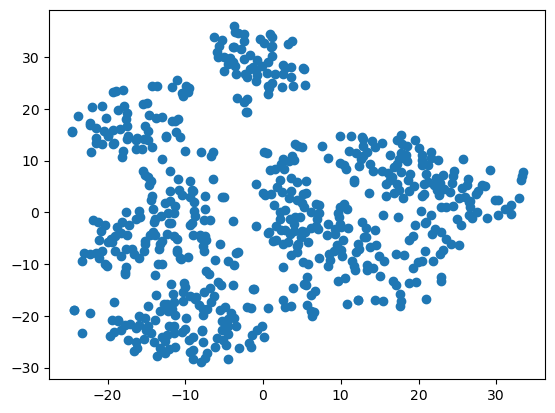

In [94]:
import matplotlib.pyplot as plt
plt.scatter(reduced_myopia_df["x"], reduced_myopia_df["y"])
plt.show()